In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Q1. Convolution implementation

In [2]:
def convolution(data, kernel, stride=1):
    """
    Discrete 1D convolution with zero padding and stride.
    
    Parameters:
        data (list | np.ndarray): Input sequence
        kernel (list | np.ndarray): Odd-length kernel
        stride (int, default=1): Stride length
    Returns:
        np.ndarray: Convolution result
    """
    result = []
    N = len(data)
    k = len(kernel)
    for i in range(0, N, stride):
        s = 0.0
        for j in range(k):
            m = i - k//2 + j
            if m > -1 and m < N:
                s += data[m]*kernel[j]
        result.append(s)
    return np.array(result)

You can also do it using np.pad. Solution using that is given below.

In [3]:
def convolution(data, kernel, stride=1):
    """
    Discrete 1D convolution with zero padding and stride.
    
    Parameters:
        data (list | np.ndarray): Input sequence
        kernel (list | np.ndarray): Odd-length kernel
        stride (int, default=1): Stride length
    Returns:
        np.ndarray: Convolution result
    """
    data = np.array(data, dtype=float)
    kernel = np.array(kernel, dtype=float)
    N, k = len(data), len(kernel)
    pad = k // 2
    
    # Zero-padded data
    padded = np.pad(data, (pad, pad))
    
    result = []
    for i in range(pad, pad + N, stride): 
        window = padded[i-pad:i-pad+k] #centered at i
        result.append(np.sum(window * kernel))
    return np.array(result)



In [4]:
print(convolution(np.arange(5), [1/3, 1/3, 1/3]))
print(convolution(np.arange(5), [1/3, 1/3, 1/3], stride=2))
print(convolution([1,4,9,16,25],[0.25, 0.5, 0.25])) # extra test case

[0.33333333 1.         2.         3.         2.33333333]
[0.33333333 2.         2.33333333]
[ 1.5  4.5  9.5 16.5 16.5]


## Q2. Maxpool implementation

In [19]:
def max_pool(data, stride=2):
    """
    Sliding-window max pooling with stride.
    
    Parameters:
        data (list | np.ndarray)
        stride (int, default=2)
    Returns:
        np.ndarray
    """
    result = []
    for i in range(0, len(data), stride):
        result.append(max(data[i:i+stride]))
    return np.array(result)

In [20]:
print(max_pool(range(5)))
print(max_pool(range(6)))
print(max_pool(range(6), stride=3))

[1 3 4]
[1 3 5]
[2 5]


## Q3. Layer Norm implementation

In [6]:
def layer_norm(data):
    """
    Apply layer normalization: (x - mean)/std
    
    Parameters:
        data (list | np.ndarray)
    Returns:
        np.ndarray
    """
    data = np.array(data, dtype=float)
    mu = data.mean()
    sigma = data.std(ddof=0)
    return (data - mu) / sigma

In [7]:
x = np.array([1,2,3,4,5])
print(layer_norm(x))
print(layer_norm(x).mean(), layer_norm(x).std()) 

[-1.41421356 -0.70710678  0.          0.70710678  1.41421356]
0.0 0.9999999999999999


In [8]:
# helper function for loading batsmen
# There were some issues with sehwag.txt in the previous data folder. So it is okay if that is not included in the analysis
def load_scores():
    batsmen = ["Rohit", "Gambhir", "Kohli", "Sachin", "Sehwag","Kapil Dev"]
    files = ["rohit.txt","gambhir.txt","kohli.txt","sachin.txt","sehwag.txt","kapil_dev.txt"]
    scores = {}
    for name, f in zip(batsmen, files):
        arr = np.loadtxt("../data/"+ f)
        scores[name] = arr
    return scores

scores = load_scores()

## Q4. Box plot

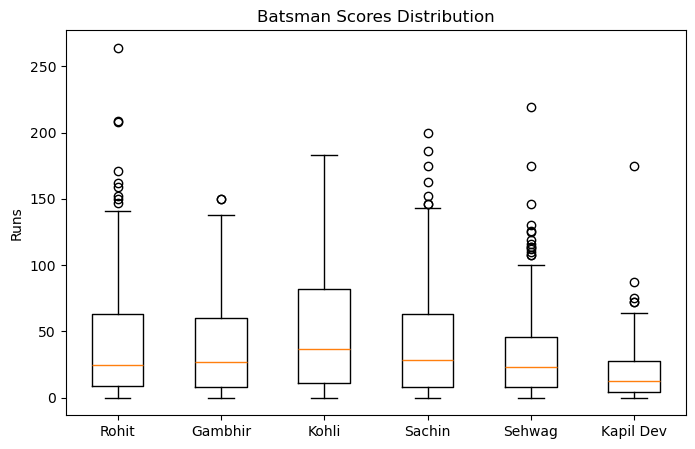

In [11]:
plt.figure(figsize=(8,5))
plt.boxplot(scores.values(), tick_labels=scores.keys()) 
plt.title("Batsman Scores Distribution")
plt.ylabel("Runs")
plt.show()

# Comment: From the boxplot, one can judge best batsman by median + lower spread.

## Q5. Means with error bars

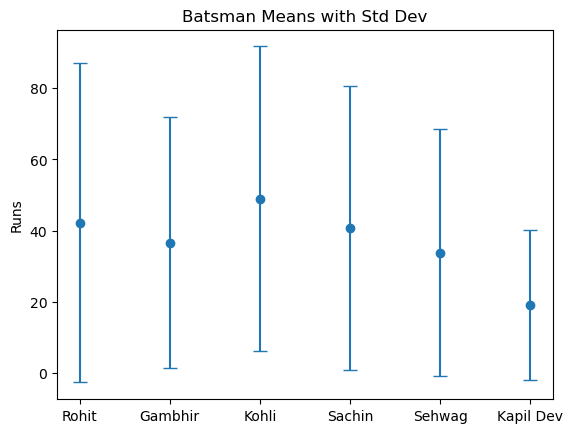

In [12]:
means = [np.mean(v) for v in scores.values()]
stds = [np.std(v) for v in scores.values()]
xpos = np.arange(len(scores))

plt.errorbar(xpos, means, yerr=stds, fmt='o', capsize=5)
plt.xticks(xpos, list(scores.keys()))
plt.ylabel("Runs")
plt.title("Batsman Means with Std Dev")
plt.show()

## Q6. PMF & Conditional Probabilities

In [29]:
def pmf(data):
    """Return pmf over integer scores using np.histogram with density=True."""
    max_score = int(max(data))
    counts, _ = np.histogram(data, bins=range(max_score+2), density=True)
    return counts

def cond_prob(scores, a=5, b=50):
    """P(X>50 | X>5)"""
    max_score = int(max(scores))
    pmf_vals, width = np.histogram(scores, bins=range(max_score+2), density=True)
    cdf = np.cumsum(pmf_vals)
    
    prob_gt_5 = 1 - cdf[a]
    prob_gt_50 = 1 - cdf[b]
    return prob_gt_50 / prob_gt_5 if prob_gt_5>0 else 0

for name, arr in scores.items():
    print(f"{name}: P(X>50 | X>5) = {cond_prob(arr):.4f}")

Rohit: P(X>50 | X>5) = 0.4306
Gambhir: P(X>50 | X>5) = 0.3793
Kohli: P(X>50 | X>5) = 0.5187
Sachin: P(X>50 | X>5) = 0.3972
Sehwag: P(X>50 | X>5) = 0.2746
Kapil Dev: P(X>50 | X>5) = 0.1014
